# The Competition

This is one of the famous kaggle competition which was categorized as knowledge projects.

**What we do**

Here, I use the simple Linear Regression method to predict homes sale price. I will go through the following four steps:

* Obtain the data
* Explore the data and Feature engineering
* Build a model
* Make a submission file

## Step 1: Obtain the data

At the first step we need to download the competition [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

File descriptions
* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms
It is very useful to take a look at data_description.txt file that contains all information about the features in this competition.

The standard packages we use to make our enviroment are:

In [1]:
import pandas as pd
import numpy as np


To do plotting during the exploration step, we need to import matplotlib package which is a popular visualization library.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

We define the style and the size of plots

In [3]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

Using pd.read_csv() method, we create DataFrames from csv files.

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


The test dataframe contains 80 features, while the train dataframe has 81 features. The difference comes from this fact that the test data does not have the sale price column!

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Aim of the competition** 

The aim of this competition is to predict the final price of each home in the test dataset. Some knowledge about important features in house price could be very useful in modeling. For example we expect that house price should be related to the age of a house (or its construction year) and the area of the house. We explore such features in the next step.

## Step 2: Explore the data and engineer Features


In the training dataset, the SalePrice column (target variable) shows this information.
Series.describe() gives us useful statistical information about the target variable.

In [7]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

One of the most important way to view SalePrice behavior os to take a look at its distribution using plt.hist().

Skew is: 1.8828757597682129


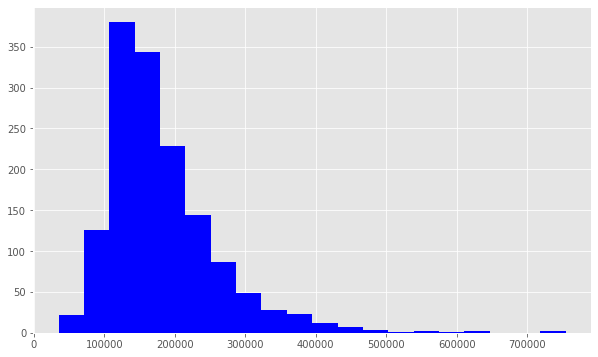

In [8]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, bins = 20, color='blue')
plt.show()

Since, we are going to use Linear Regression method and the data are skewed, it is better to take logarithm of the price values using np.log() for removing skewness and getting more precise predictions.

Skew is: 0.12133506220520406


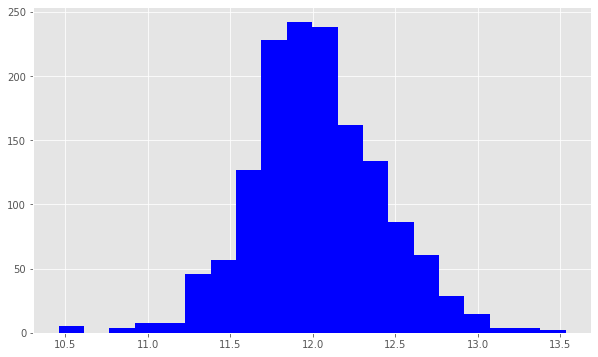

In [9]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, bins = 20, color='blue')
plt.show()

Now we see that the skewness of logarithm values is become close to zero which means that we were succesful in removing the skewness of the data. This is also reflected in the new distribution which is now closer to the normal distribution.

### Dealing with numeric features

Using the .select_dtypes() method we can return numeric columns.

In [10]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

At this point it is very useful to look for the correlation between the different features and SalePrice. For this purpose we use DataFrame.corr() method.

In [11]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five features are the most correlated features, while the next five are the most anti-correlated features.

Let's take a look at the most correlated feature i.e., OverallQual.

In [12]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

According to the info provided in data_description.txt file:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
We expect that there is a direct relation between OverallQual and SalePrice. To check our expectation we creat a pivot table by setting index='OverallQual' and values='SalePrice' and use mean as aggregation function.

In [13]:
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice',
                                  aggfunc=np.mean)
quality_pivot

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


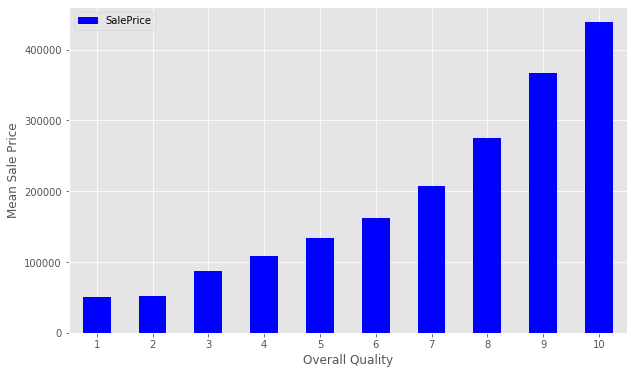

In [14]:
quality_pivot.plot.bar(color='blue', rot=0)
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.show()

The above plot exactly shows strictly increasing behavior. 

The next feature that is worth taking a deeper look at is GrLivArea which has the most correlation after OverallQual feature. This feature has integer values but so many. Thus, it is better to use plt.scatter() to visualize the relationship between GrLivArea and SalePrice.

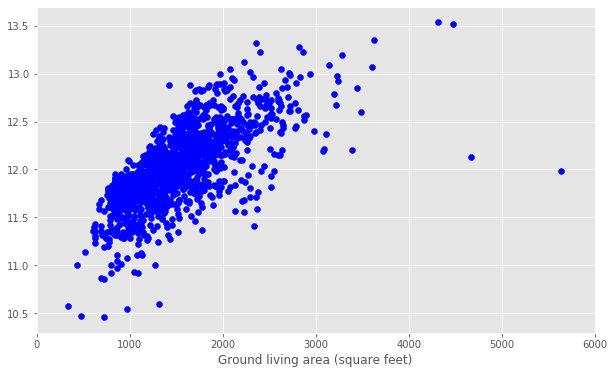

In [15]:
plt.scatter(x=train['GrLivArea'], y=target, color='b')
plt.xlim(0,6000) 
plt.xlabel('Ground living area (square feet)')
plt.show()

In [16]:
train = train[train['GrLivArea'] < 4000]

We will do the same for GarageArea.

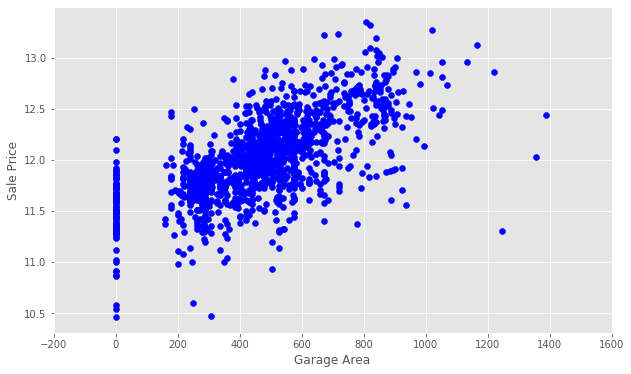

In [17]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice), color='b')
plt.xlim(-200,1600) 
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Because there are many houses with 0 value for Garage Area, showing they don’t have a garage. There are also a few outliers where again we remove them.

In [18]:
train = train[train['GarageArea'] < 1200]

## Dealing with non-numeric features


Using select_dtypes we can separate the non-numeric features from dataset easlily.



In [19]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1452,1452,91,1452,1452,1452,1452,1452,1452,1452,...,1371,1371,1371,1371,1452,5,280,53,1452,1452
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1144,1447,50,921,1307,1451,1047,1375,225,1255,...,865,605,1303,1318,1332,2,156,48,1264,1195


The count row shows the number of non-null observations and unique shows the number of unique values. The top row displays the most occurring value with the freq row as its frequency.

For considering non-numeric features in modeling one needs to use one-hot encoding methods. This method is used for converting categorical data into numerical data so that the Linear Regression model can understand them.

## Transforming and engineering features


For transforming features, the most important part is to remember that any transformations applied to the training dataset must be applied to the test dataset as well. In other words, any feature engineering should be applied on both datasets. 

In the following we will show the process for a non-numeric feature named Street. The Street column has two values: Gravel or Paved, which is the type of road access to the house.

In [20]:
train.Street.value_counts()

Pave    1447
Grvl       5
Name: Street, dtype: int64

Since the model needs numerical data, we use one-hot encoding to transform the categorical data into Boolean using pd.get_dummies() method. The new data is added to the new column named "enc_street". 

In [21]:
train['enc_Street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_Street'] = pd.get_dummies(train.Street, drop_first=True)

In [23]:
train.enc_Street.value_counts()

1    1447
0       5
Name: enc_Street, dtype: int64

The next feature we are going to engineer it is SaleCondition. It has 6 different values:

* Normal:	Normal Sale
* Abnorml:	Abnormal Sale -  trade, foreclosure, short sale
* AdjLand:	Adjoining Land Purchase
* Alloca:	Allocation - two linked properties with separate deeds, typically condo with a garage unit
* Family:	Sale between family members
* Partial:	Home was not completed when last assessed (associated with New Homes)
       
First we look at the relation berween different values with the mean value of SalePrice for that value using pivot_table as what we did above for OverallQual.

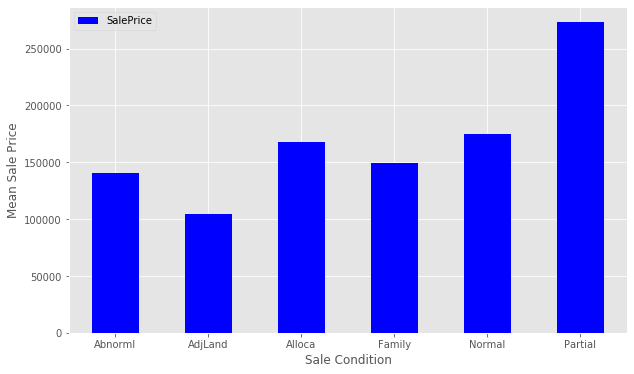

In [24]:
condition_pivot = train.pivot_table(index='SaleCondition', values='SalePrice',
                                    aggfunc=np.mean)
condition_pivot.plot.bar(color='blue', rot=0)
plt.xlabel('Sale Condition')
plt.ylabel('Mean Sale Price')
plt.show()

As seen from this plot, the partial value has the highest mean SalePrice. Thus, one way for encoding this feature is to transfor "Partial" value of SaleCondition to 1 and other values to 0. This is easily done by applying the following function to both tain and test datasets.

In [25]:
def encode(x):
    return 1 if x == 'Partial' else 0
train['enc_SaleCondition'] = train.SaleCondition.apply(encode)
test['enc_SaleCondition'] = test.SaleCondition.apply(encode)

Let’s explore this new feature as a plot.



This can be repeated for other features to improve modeling result. 

Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process, where creativity and insight can make a big difference. This is another area where you can extend on this tutorial.

## Dealing with null values

Now, we are going to investigate the null values. This can be done using train.isnull().sum() method which return the number of null values for each feature.

In [26]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Number of Null Values']
nulls.index.name = 'Feature'
nulls

,Number of Null Values
Feature,
PoolQC,1447
MiscFeature,1399
Alley,1361
Fence,1172
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageType,81


Here is where that the data_description.txt file can help a lot to understand null values. For example, Pool quality (PoolQC) is null when there is no pool in the house.

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
       
Note that it is important to provide knowledge about the problem and its featutes to make the best decisions when dealing with null values.

In [27]:
train.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

If one wants to consider this categorical feature in modeling it is needed to convert it into numerical data.

In [28]:
train.PoolQC.value_counts()

Fa    2
Gd    2
Ex    1
Name: PoolQC, dtype: int64

However, since most of the houses has no pool it is plausible to simply neglect this feature in modeling. 

**Note**: We are going to use numerical features for our modeling and hence we will do something for their null values 

In [29]:
data = train.select_dtypes(include=[np.number])

In [30]:
data.isnull().sum().sort_values(ascending=False)[:5]

LotFrontage          258
GarageYrBlt           81
MasVnrArea             8
enc_SaleCondition      0
BsmtFinSF2             0
dtype: int64

As seen, there are only three numeric feature that have null values: *LotFrontage*, *GarageYrBlt*, and *MasVnrArea*.

We use the interpolate() function to fill the missing values using linear method.

In [31]:
data = data.interpolate()

We recheck all the columns for null values

In [32]:
sum(data.isnull().sum() != 0)

0

# Step 3 : Build a linear model


Here, we separate the features and the target variable from training datasets. All the features except "SalePrice" and "Id" go to X and the logarithm of SalePrice (target variable) goes to y.


In [33]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

We split X and y to train and valid sets. Partitioning the data into train and valid allows us to evaluate our model performance. This way, we can check that whether our model contains overfitting or not before applying it for the final prediction.

For splitinh we use the train_test_split() function from scikit-learn.
train_test_split() returns four objects:

* X_train is the subset of features used for training.
* X_valid is the subset of features which will be used to test the model.
* y_train is the target variable SalePrice corresponding to X_train.
* y_valid is the target variable SalePrice corresponding to X_valid.

We devote one third of the training set for validation by setting test_size equal to 0.33. Since, train_test_split will randomly partition the data, in order to have a fix partitioning for reproducible results we fix random seed by setting random_state=7. 

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(
                          X, y, random_state=7, test_size=.33)

## Linear Regression Modelling


In [36]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Now, we are ready to to fit the model. Fitting means finding the relation between X and y over the training set. After that, we validate the trianed model using the validation set.

In [37]:
model = lr.fit(X_train, y_train)

## Model performance


In this competition, Root Mean Squared Error (RMSE) is chosen as evaluation metric. After training the model, we use it for predicting the target value corresponding to X_valid as follows.

In [38]:
y_pred = model.predict(X_valid)

The mean_squared_error function takes y_valid and y_pred and calculates the rmse.

In [39]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_valid, y_pred))

RMSE is: 
 0.016575835120552586


The RMSE measures the mean value of distance between a prediction and actual value.

In order to get a better sense of the result we plot the predicted price vs actual price.

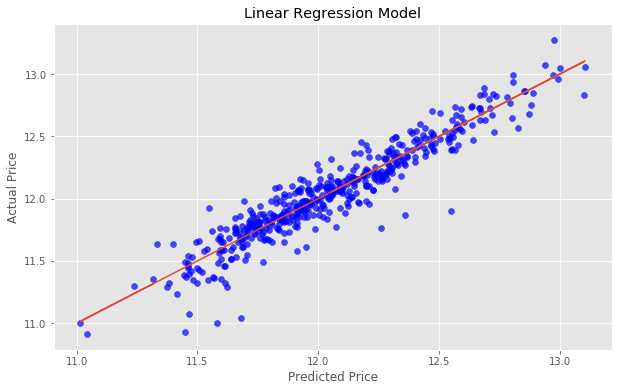

In [40]:
plt.scatter(y_pred, y_valid, alpha=.7, color='b')
plt.plot(y_pred,y_pred)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

The red line shows the case of 100% successful prediction i.e., actual price = predicted price. The shape of scattered points around this line shows how much our model predicts well.

# Step 4: Make a submission file


Now, we are ready to create a csv file including the predicted SalePrice for each observation in the test.csv dataset. After making submission file we should go to the submission page to make a submission. 

In [41]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Note that we should select the features from the test data as we did before. Then, we generate predictions.

In [42]:
X_test = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [43]:
predictions = model.predict(X_test)

We should notice that our model was trained using the logarithm value of SalePrice and thus in order to get a correct predcited SalePrice we should transform the predictions to the correct form by taking exp() of the predictions.

In [44]:
final_predictions = np.exp(predictions)

Lets assign these predictions and check that everything looks good.



In [45]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,123715.167556
1,1462,119001.169006
2,1463,175805.711965
3,1464,196198.979567
4,1465,176669.768945


Now that we see the submission dataframe is in the proper format, we can export it to a .csv file for Kaggle submission.

In [46]:
submission.to_csv('submission.csv', index=False)

## Submit the results :)